## 只采用了这部分的图1

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Sat Dec 26 20:29:15 2020

@author: 15811
"""

import os
#os.chdir('E:/0-研究生/其他投稿&审稿/疫苗paper2/实验/代码/skccm')
import skccm
import data
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import paper

from array import *
sns.set_style('ticks')
sns.set_context(context='paper',font_scale=1.5)
plt.rcParams['font.sans-serif'] = ['Times New Roman']  # 字体
plt.rcParams['axes.unicode_minus']=False # 用来正常显示负号

#data
import pandas as pd
data=pd.read_csv('ccmdata.csv')
data.head()


,date,India,France,Africa,US,China,UK,Red Cross,GOP,WHO,...,Donald Trump,Joe Biden,Emmanuel Macron,Narendra Modi,Vladimir Putin,global health,public health,one health,decolonization in health policy,decolonization
0,201304,0.000000,0.031250,0.081081,0.0375,0.060606,0.380952,0.307692,0.142857,0.125000,...,0.005025,0.0,0.0,0.010309,0.010309,0.169014,0.178082,0.034091,0,0.032936
1,201305,0.133333,0.078125,0.054054,0.0375,0.015152,0.380952,0.461538,0.120879,0.125000,...,0.005025,0.0,0.0,0.000000,0.000000,0.056338,0.164384,0.011364,0,0.023826
2,201306,0.244444,0.093750,0.000000,0.0250,0.000000,0.333333,0.307692,0.131868,0.053571,...,0.000000,0.0,0.0,0.020619,0.041237,0.000000,0.123288,0.022727,0,0.081289
3,201307,0.177778,0.234375,0.027027,0.0125,0.000000,0.380952,0.230769,0.109890,0.035714,...,0.000000,0.0,0.0,0.030928,0.000000,0.070423,0.136986,0.034091,0,0.126139
4,201308,0.311111,0.015625,0.135135,0.0250,0.030303,0.476190,0.153846,0.120879,0.107143,...,0.000000,0.0,0.0,0.041237,0.010309,0.098592,0.164384,0.034091,0,0.204625


In [29]:
choice=['Africa','China','Donald Trump','Joe Biden','muslim']

In [7]:
#choice=['India', 'France', 'Africa', 'US', 'China', 'UK', 'Red Cross',
#       'GOP', 'WHO', 'UN', 'left wing', 'right wing', 'communist', 'socialist',
#       'republican(US)', 'democrat(US)', 'labour(UK)', 'conservative(UK)',
#       'ICU', 'vaccination', 'maoist', 'christian', 'muslim', 'islamic',
#       'ministry of justice', 'ministry of health', 'senate', 'congress',
#       'woman', 'rebel', 'native', 'prime minister', 'chief', 'mayor',
#       'Xi Jinping', 'Donald Trump', 'Joe Biden', 'Emmanuel Macron',
#       'Narendra Modi', 'Vladimir Putin', 'global health', 'public health',
#       'one health']

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


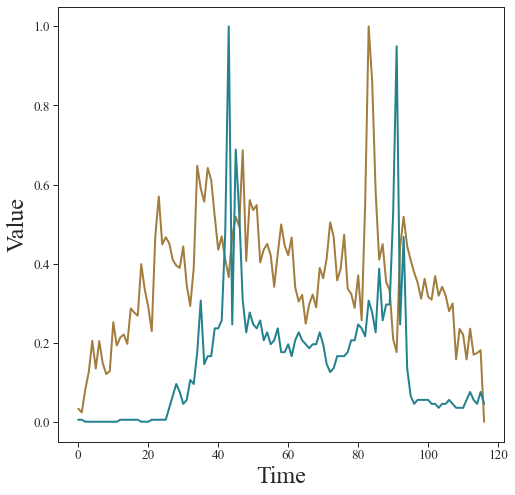

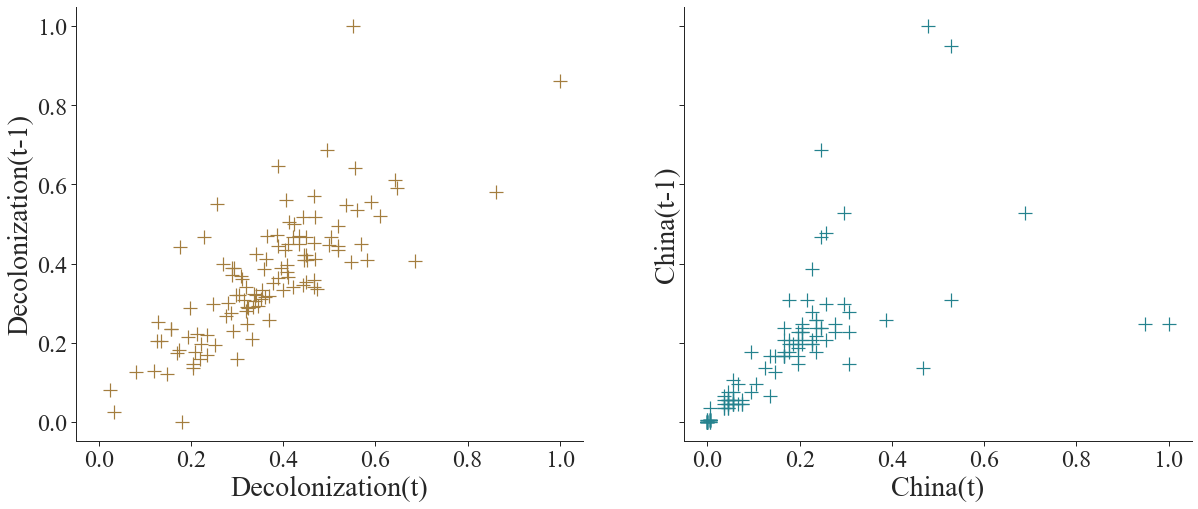

In [60]:
'''
#1、产生时间序列
rx1=3.72
rx2=3.72
#x1对x2的影响大于x2对x1的影响
b12=0.2
b21=0.01
ts_length=1000
x1,x2=data.coupled_logistic(rx1,rx2,b12,b21,ts_length)
'''
color1 = "#A37D3E"
color2 = "#24828E"
#加载时间序列
x1=np.array(data['decolonization']) #需根据数据变化名字
x2=np.array(data['Donald Trump'])

#原始数据同一图
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
ax.set_xlabel("Time",fontsize=24)
ax.set_ylabel('Value',fontsize=24)
#plt.tick_params(labelsize=20)
#ax.plot(x1, label='decolonization',color=color1, linewidth=2) #需根据数据变化名字 颜色可改
#ax.plot(x2,label='communist', color=color2,linewidth=2) 
ax.plot(x1,color=color1, linewidth=2) #需根据数据变化名字 颜色可改
ax.plot(x2,color=color2,linewidth=2) 
fig.legend(loc=2, bbox_to_anchor=(0,1),frameon=False, bbox_transform=ax.transAxes,fontsize=24)



#2、计算互信息
e1 = paper.Embed(x1)
e2 = paper.Embed(x2)
mi1 = e1.mutual_information(10)
mi2 = e2.mutual_information(10)
#画图
# fig,ax = plt.subplots(nrows=2,sharex=True,sharey=True)
# ax[0].plot(np.arange(1,11),mi1)
# ax[1].plot(np.arange(1,11),mi2)
# ax[1].set_xlabel('Lag')
# sns.despine()

#3、嵌入两个时间序列
lag = 1
embed = 2
X1 = e1.embed_vectors_1d(lag,embed)
X2 = e2.embed_vectors_1d(lag,embed)
fig,ax = plt.subplots(ncols=2,sharey=True,sharex=True,figsize=(20,8)) 
ax[0].scatter(X1[:,0],X1[:,1],color=color1,marker='+',s=200)
ax[1].scatter(X2[:,0],X2[:,1], color=color2,marker='+',s=200)
ax[0].set_xlabel('Decolonization(t)',fontsize=28)  #改成对应的数据名
ax[0].set_ylabel('Decolonization(t-1)',fontsize=28)
ax[1].set_xlabel('China(t)',fontsize=28)
ax[1].set_ylabel('China(t-1)',fontsize=28)
ax[0].tick_params(labelsize=24)
ax[1].tick_params(labelsize=24)
sns.despine()



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


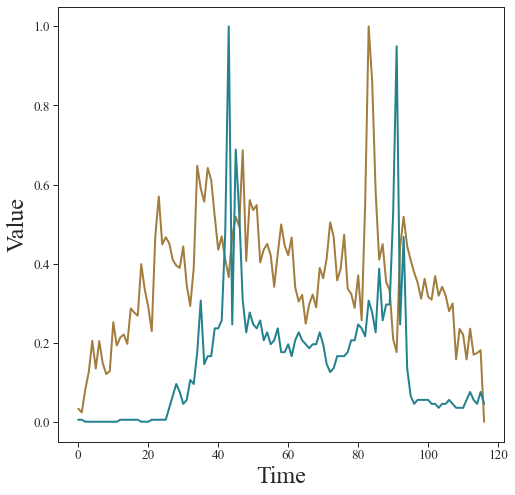

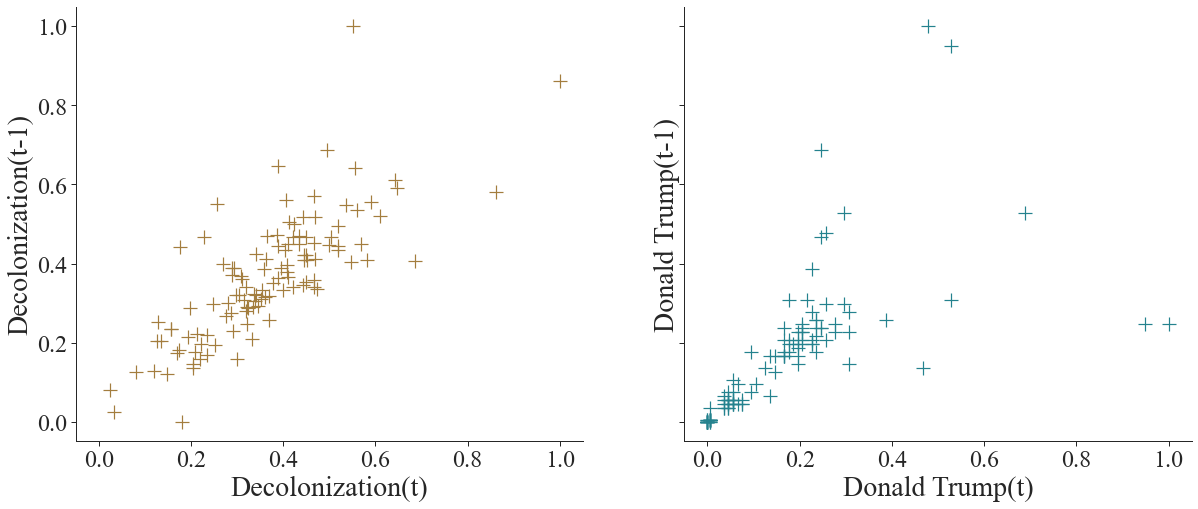

In [38]:
'''
#1、产生时间序列
rx1=3.72
rx2=3.72
#x1对x2的影响大于x2对x1的影响
b12=0.2
b21=0.01
ts_length=1000
x1,x2=data.coupled_logistic(rx1,rx2,b12,b21,ts_length)
'''
color1 = "#A37D3E"
color2 = "#24828E"
#加载时间序列
x1=np.array(data['decolonization']) #需根据数据变化名字
x2=np.array(data['Donald Trump'])

#原始数据同一图
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
ax.set_xlabel("Time",fontsize=24)
ax.set_ylabel('Value',fontsize=24)
#plt.tick_params(labelsize=20)
#ax.plot(x1, label='decolonization',color=color1, linewidth=2) #需根据数据变化名字 颜色可改
#ax.plot(x2,label='communist', color=color2,linewidth=2) 
ax.plot(x1,color=color1, linewidth=2) #需根据数据变化名字 颜色可改
ax.plot(x2,color=color2,linewidth=2) 
fig.legend(loc=2, bbox_to_anchor=(0,1),frameon=False, bbox_transform=ax.transAxes,fontsize=24)



#2、计算互信息
e1 = paper.Embed(x1)
e2 = paper.Embed(x2)
mi1 = e1.mutual_information(10)
mi2 = e2.mutual_information(10)
#画图
# fig,ax = plt.subplots(nrows=2,sharex=True,sharey=True)
# ax[0].plot(np.arange(1,11),mi1)
# ax[1].plot(np.arange(1,11),mi2)
# ax[1].set_xlabel('Lag')
# sns.despine()

#3、嵌入两个时间序列
lag = 1
embed = 2
X1 = e1.embed_vectors_1d(lag,embed)
X2 = e2.embed_vectors_1d(lag,embed)
fig,ax = plt.subplots(ncols=2,sharey=True,sharex=True,figsize=(20,8)) 
ax[0].scatter(X1[:,0],X1[:,1],color=color1,marker='+',s=200)
ax[1].scatter(X2[:,0],X2[:,1], color=color2,marker='+',s=200)
ax[0].set_xlabel('Decolonization(t)',fontsize=28)  #改成对应的数据名
ax[0].set_ylabel('Decolonization(t-1)',fontsize=28)
ax[1].set_xlabel('Donald Trump(t)',fontsize=28)
ax[1].set_ylabel('Donald Trump(t-1)',fontsize=28)
ax[0].tick_params(labelsize=24)
ax[1].tick_params(labelsize=24)
sns.despine()




No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


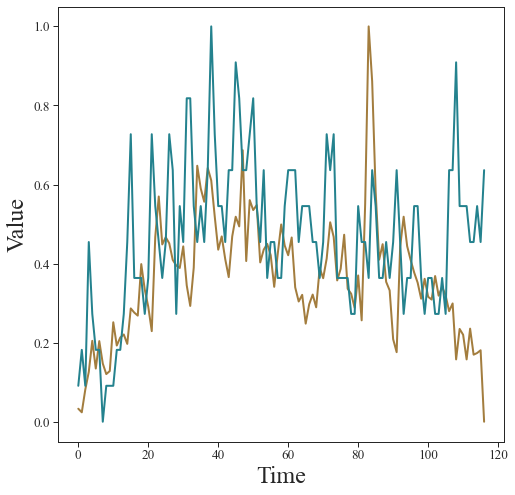

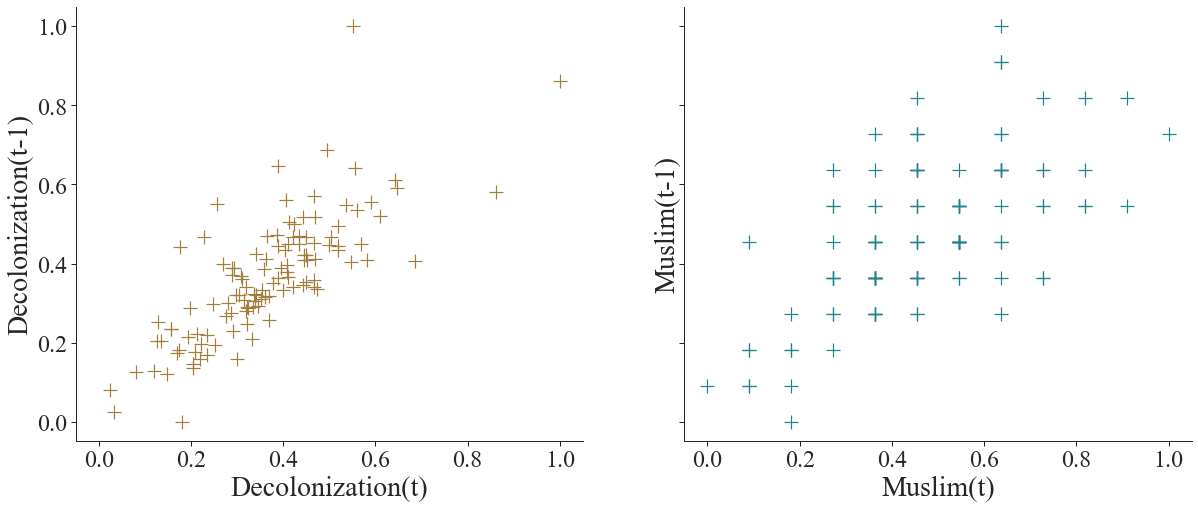

In [40]:
'''
#1、产生时间序列
rx1=3.72
rx2=3.72
#x1对x2的影响大于x2对x1的影响
b12=0.2
b21=0.01
ts_length=1000
x1,x2=data.coupled_logistic(rx1,rx2,b12,b21,ts_length)
'''
color1 = "#A37D3E"
color2 = "#24828E"
#加载时间序列
x1=np.array(data['decolonization']) #需根据数据变化名字
x2=np.array(data['muslim'])

#原始数据同一图
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
ax.set_xlabel("Time",fontsize=24)
ax.set_ylabel('Value',fontsize=24)
#plt.tick_params(labelsize=20)
#ax.plot(x1, label='decolonization',color=color1, linewidth=2) #需根据数据变化名字 颜色可改
#ax.plot(x2,label='communist', color=color2,linewidth=2) 
ax.plot(x1,color=color1, linewidth=2) #需根据数据变化名字 颜色可改
ax.plot(x2,color=color2,linewidth=2) 
fig.legend(loc=2, bbox_to_anchor=(0,1),frameon=False, bbox_transform=ax.transAxes,fontsize=24)



#2、计算互信息
e1 = paper.Embed(x1)
e2 = paper.Embed(x2)
mi1 = e1.mutual_information(10)
mi2 = e2.mutual_information(10)
#画图
# fig,ax = plt.subplots(nrows=2,sharex=True,sharey=True)
# ax[0].plot(np.arange(1,11),mi1)
# ax[1].plot(np.arange(1,11),mi2)
# ax[1].set_xlabel('Lag')
# sns.despine()

#3、嵌入两个时间序列
lag = 1
embed = 2
X1 = e1.embed_vectors_1d(lag,embed)
X2 = e2.embed_vectors_1d(lag,embed)
fig,ax = plt.subplots(ncols=2,sharey=True,sharex=True,figsize=(20,8)) 
ax[0].scatter(X1[:,0],X1[:,1],color=color1,marker='+',s=200)
ax[1].scatter(X2[:,0],X2[:,1], color=color2,marker='+',s=200)
ax[0].set_xlabel('Decolonization(t)',fontsize=28)  #改成对应的数据名
ax[0].set_ylabel('Decolonization(t-1)',fontsize=28)
ax[1].set_xlabel('Muslim(t)',fontsize=28)
ax[1].set_ylabel('Muslim(t-1)',fontsize=28)
ax[0].tick_params(labelsize=24)
ax[1].tick_params(labelsize=24)
sns.despine()





## CCM部分

In [9]:
import pyEDM

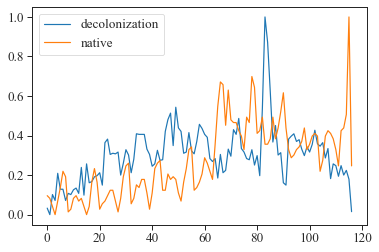

In [10]:
import pandas as pd
xlsx_file = "ccmdata.xlsx"
MyData = pd.read_excel(xlsx_file, sheet_name="ccmdata")
MyData[['decolonization','native']].plot();

In [23]:
choice=['India', 'France', 'Africa', 'US', 'China', 'UK', 'RedCross',
       'GOP', 'WHO', 'UN', 'leftwing', 'rightwing', 'communist', 'socialist',
       'republican', 'democrat', 'labour', 'conservative',
       'ICU', 'vaccination', 'maoist', 'christian', 'muslim', 'islamic',
       'justice', 'ministryofhealth', 'senate', 'congress',
       'woman', 'rebel', 'native', 'primeminister', 'chief', 'mayor',
       'XiJinping', 'DonaldTrump', 'JoeBiden', 'EmmanuelMacron',
       'NarendraModi', 'VladimirPutin', 'globalhealth', 'publichealth',
       'onehealth']

In [64]:
#初步筛选choice中结果较好的部分，get result的有
choice=['Africa','China','DonaldTrump','JoeBiden','muslim']

<Figure size 432x720 with 0 Axes>

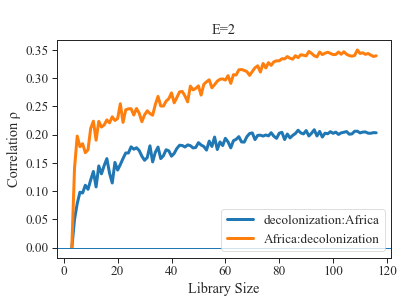

<Figure size 432x720 with 0 Axes>

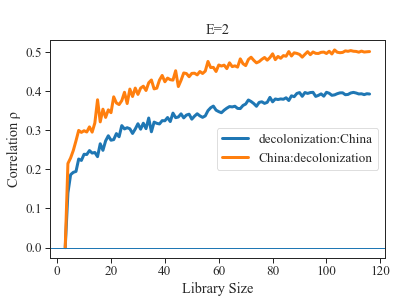

<Figure size 432x720 with 0 Axes>

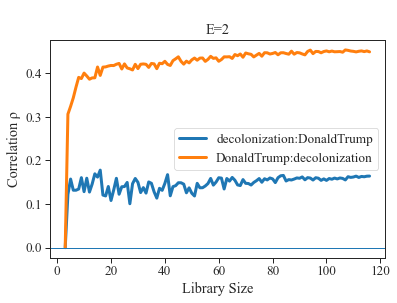

<Figure size 432x720 with 0 Axes>

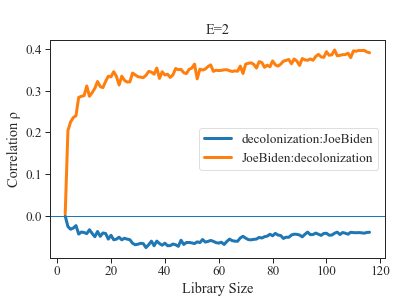

<Figure size 432x720 with 0 Axes>

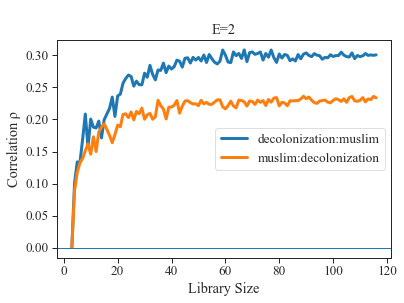

In [65]:
for i in choice:
    MyData = pd.read_excel(xlsx_file, sheet_name="ccmdata")
    target=i
    plt.figure(figsize=(6, 10))
    myDataFrame=pyEDM.CCM(dataFrame = MyData, E=2, columns="decolonization"
                                , target=i,libSizes = "3 116 1",showPlot=True, sample=100);
    plt.show()
    #plt.savefig(i + 'myDataFrame.svg')

## 图2和图3

In [41]:
!pip install jdc # used fo defining functions for a class in separate cells
import jdc # used fo defining functions for a class in separate cells
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial import distance
from scipy.interpolate import make_interp_spline
from tqdm import tqdm # for showing progress bar in for loops

In [56]:
def shadow_manifold(X, tau, E, L):
    """
    Args
        X: some time series vector
        tau: lag step
        E: shadow manifold embedding dimension
        L: max time step to consider - 1 (starts from 0)
    Returns
        {t:[t, t-tau, t-2*tau ... t-(E-1)*tau]} = Shadow attractor manifold, dictionary of vectors
    """
    X = X[:L] # make sure we cut at L
    M = {t:[] for t in range((E-1) * tau, L)} # shadow manifold
    for t in range((E-1) * tau, L):
        x_lag = [] # lagged values
        for t2 in range(0, E-1 + 1): # get lags, we add 1 to E-1 because we want to include E
            x_lag.append(X[t-t2*tau])            
        M[t] = x_lag
    return M
# get pairwise distances between vectors in X
def get_distances(Mx):
    """
    Args
        Mx: The shadow manifold from X
    Returns
        t_steps: timesteps
        dists: n x n matrix showing distances of each vector at t_step (rows) from other vectors (columns)
    """

    # we extract the time indices and vectors from the manifold Mx
    # we just want to be safe and convert the dictionary to a tuple (time, vector)
    # to preserve the time inds when we separate them
    t_vec = [(k, v) for k,v in Mx.items()]
    t_steps = np.array([i[0] for i in t_vec])
    vecs = np.array([i[1] for i in t_vec])
    dists = distance.cdist(vecs, vecs)    
    return t_steps, dists
def get_nearest_distances(t, t_steps, dists, E):
    """
    Args:
        t: timestep of vector whose nearest neighbors we want to compute
        t_teps: time steps of all vectors in Mx, output of get_distances()
        dists: distance matrix showing distance of each vector (row) from other vectors (columns). output of get_distances()
        E: embedding dimension of shadow manifold Mx 
    Returns:
        nearest_timesteps: array of timesteps of E+1 vectors that are nearest to vector at time t
        nearest_distances: array of distances corresponding to vectors closest to vector at time t
    """
    t_ind = np.where(t_steps == t) # get the index of time t
    dist_t = dists[t_ind].squeeze() # distances from vector at time t (this is one row)
    
    # get top closest vectors
    nearest_inds = np.argsort(dist_t)[1:E+1 + 1] # get indices sorted, we exclude 0 which is distance from itself
    nearest_timesteps = t_steps[nearest_inds] # index column-wise, t_steps are same column and row-wise 
    nearest_distances = dist_t[nearest_inds] 
    # print(nearest_distances) 
    
    return nearest_timesteps, nearest_distances
# Computing "Causality" (Correlation between True and Predictions)

class ccm:
    def __init__(self, X, Y, tau=1, E=2, L=500):
        '''
        X: 
        
        Y: timeseries for variable Y that could be caused by X
        tau: time lag
        E: shadow manifold embedding dimension
        L: time period/duration to consider (longer = more data)
        We're checking for X -> Y
        '''
        self.X = X
        self.Y = Y
        self.tau = tau
        self.E = E
        self.L = L        
        self.My = shadow_manifold(self.Y, self.tau, self.E, self.L) # shadow manifold for Y (we want to know if info from X is in Y)
        self.t_steps, self.dists = get_distances(self.My) # for distances between points in manifold    
        
    def causality(self):
        '''
        Args:
            None
        Returns:
            correl: how much self.X causes self.Y. correlation between predicted Y and true Y
        '''
        
        # run over all timesteps in M
        # X causes Y, we can predict X using My
        # X puts some info into Y that we can use to reverse engineer X from Y        
        X_true_list = []
        X_hat_list = []

        for t in list(self.My.keys()): # for each time step in My
            X_true, X_hat = self.predict(t) # predict X from My
            X_true_list.append(X_true)
            X_hat_list.append(X_hat) 

        x, y = X_true_list, X_hat_list
        correl = np.corrcoef(x, y)[0][1]
        
        return correl 

    def predict(self, t):
        eps = 0.000001 # epsilon minimum distance possible
        t_ind = np.where(self.t_steps == t) # get the index of time t
        dist_t = self.dists[t_ind].squeeze() # distances from vector at time t (this is one row)    
        nearest_timesteps, nearest_distances = get_nearest_distances(t, self.t_steps, self.dists, E)    
        
        # get weights
        u = np.exp(-nearest_distances/np.max([eps, nearest_distances[0]])) # we divide by the closest distance to scale
        w = u / np.sum(u)
        
        # get prediction of X
        X_true = self.X[t] # get corresponding true X
        X_cor = np.array(self.X)[nearest_timesteps] # get corresponding Y to cluster in Mx
        X_hat = (w * X_cor).sum() # get X_hat
          
        # For debugging
        #     if np.isnan(X_hat):
        #         print(nearest_distances)
        #         print('u', u)
            
        return X_true, X_hat   
    def visualize_cross_mapping(self):
        # we want to check cross mapping from Mx to My and My to Mx

        f, axs = plt.subplots(1, 2, figsize=(12, 6))        
        
        for i, ax in zip((0, 1), axs): # i will be used in switching Mx and My in Cross Mapping visualization
            #===============================================
            # Shadow Manifolds Visualization

            X_lag, Y_lag = [], []
            for t in range(1, len(self.X)):
                X_lag.append(X[t-tau])
                Y_lag.append(Y[t-tau])    
            X_t, Y_t = self.X[1:], self.Y[1:] # remove first value

            ax.scatter(X_t, X_lag, s=5, label='$M_x$')
            ax.scatter(Y_t, Y_lag, s=5, label='$M_y$', c='y')

            #===============================================
            # Cross Mapping Visualization

            A, B = [(self.Y, self.X), (self.X, self.Y)][i]
            cm_direction = ['Mx to My', 'My to Mx'][i]

            Ma = shadow_manifold(A, tau, E, L)
            Mb = shadow_manifold(B, tau, E, L)

            t_steps_A, dists_A = get_distances(Ma) # for distances between points in manifold
            t_steps_B, dists_B = get_distances(Mb) # for distances between points in manifold

            # Plot cross mapping for different time steps
            timesteps = list(Ma.keys())
            for t in np.random.choice(timesteps, size=3, replace=False):
                Ma_t = Ma[t]
                near_t_A, near_d_A = get_nearest_distances(t, t_steps_A, dists_A, E)

                for i in range(E+1):
                    # points on Ma
                    A_t = Ma[near_t_A[i]][0]
                    A_lag = Ma[near_t_A[i]][1]
                    ax.scatter(A_t, A_lag, c='b', marker='s')

                    # corresponding points on Mb
                    B_t = Mb[near_t_A[i]][0]
                    B_lag = Mb[near_t_A[i]][1]
                    ax.scatter(B_t, B_lag, c='r', marker='*', s=50)  

                    # connections
                    ax.plot([A_t, B_t], [A_lag, B_lag], c='r', linestyle=':') 

            ax.set_title(f'{cm_direction} cross mapping. time lag, tau = {tau}, E = 3')
            ax.legend(prop={'size': 14})

            ax.set_xlabel('$X_t$, $Y_t$', size=15)
            ax.set_ylabel('$X_{t-1}$, $Y_{t-1}$', size=15)               
        plt.show()       
def plot_ccm_correls(X, Y, tau, E, L):
    """
    Args
        X: X time series
        Y: Y time series
        tau: time lag
        E: shadow manifold embedding dimension
        L: time duration
    Returns
        None. Just correlation plots
    """
    M = shadow_manifold(Y, tau, E, L) # shadow manifold
    t_steps, dists = get_distances(M) # for distances

    ccm_XY = ccm(X, Y, tau, E, L) # define new ccm object # Testing for X -> Y
    ccm_YX = ccm(Y, X, tau, E, L) # define new ccm object # Testing for Y -> X

    X_My_true, X_My_pred = [], [] # note pred X | My is equivalent to figuring out if X -> Y
    Y_Mx_true, Y_Mx_pred = [], [] # note pred Y | Mx is equivalent to figuring out if Y -> X

    for t in range(tau, L):
        true, pred = ccm_XY.predict(t)
        X_My_true.append(true)
        X_My_pred.append(pred)    

        true, pred = ccm_YX.predict(t)
        Y_Mx_true.append(true)
        Y_Mx_pred.append(pred)        

    # # plot
    figs, axs = plt.subplots(1, 2, figsize=(12, 5.5))
    
    # predicting X from My
    coeff = np.round(np.corrcoef(X_My_true, X_My_pred)[0][1], 2)
    axs[1].scatter(X_My_true, X_My_pred, s=50, color = '#A07936',marker='+')
    axs[1].set_xlabel('$GD(t)$ (observed)', size=15)
    # axs[1].set_ylabel('$\hat{X}(t)|M_y$ (estimated)', size=15)
    axs[1].set_ylabel('$GL(t)$ (estimated)', size=15)
    axs[1].set_title(f'tau={tau}, E={E}, L={L}, Correlation coeff = {coeff}')

    # predicting Y from Mx
    coeff = np.round(np.corrcoef(Y_Mx_true, Y_Mx_pred)[0][1], 2)
    axs[0].scatter(Y_Mx_true, Y_Mx_pred, s=50, color = '#3B8791',marker='+')
    axs[0].set_xlabel('$GL(t)$ (observed)', size=15)
    # axs[0].set_ylabel('$\hat{Y}(t)|M_x$ (estimated)', size=15)
    axs[0].set_ylabel('$GD(t)$ (estimated)', size=15)
    axs[0].set_title(f'tau={tau}, E={E}, L={L}, Correlation coeff = {coeff}')
    plt.show()
import numpy as np
X = MyData['decolonization']
X = np.array(X).tolist()
#print(X)
Y = MyData['muslim']
Y = np.array(Y).tolist()
#print(Y)

In [54]:
MyData['DonaldTrump']

0      0.005025
1      0.005025
2      0.000000
3      0.000000
4      0.000000
         ...   
112    0.075377
113    0.055276
114    0.045226
115    0.075377
116    0.045226
Name: DonaldTrump, Length: 117, dtype: float64

In [226]:
choice=['Africa','China','socialist','muslim','justice','DonaldTrump','EmmanuelMacron']

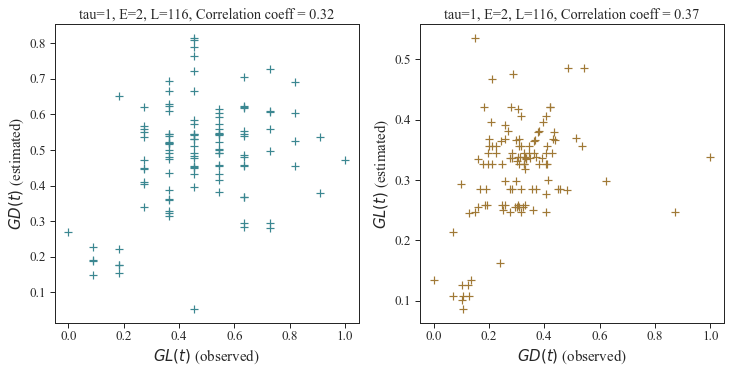

In [57]:
L = 116
tau = 1
E = 2
plot_ccm_correls(X, Y, tau, E, L)
# A title:tau=1,E=2,L=305,Correlation coeff=0.04
# B title:tau=1,E=2,L=305,Correlation coeff=0.6